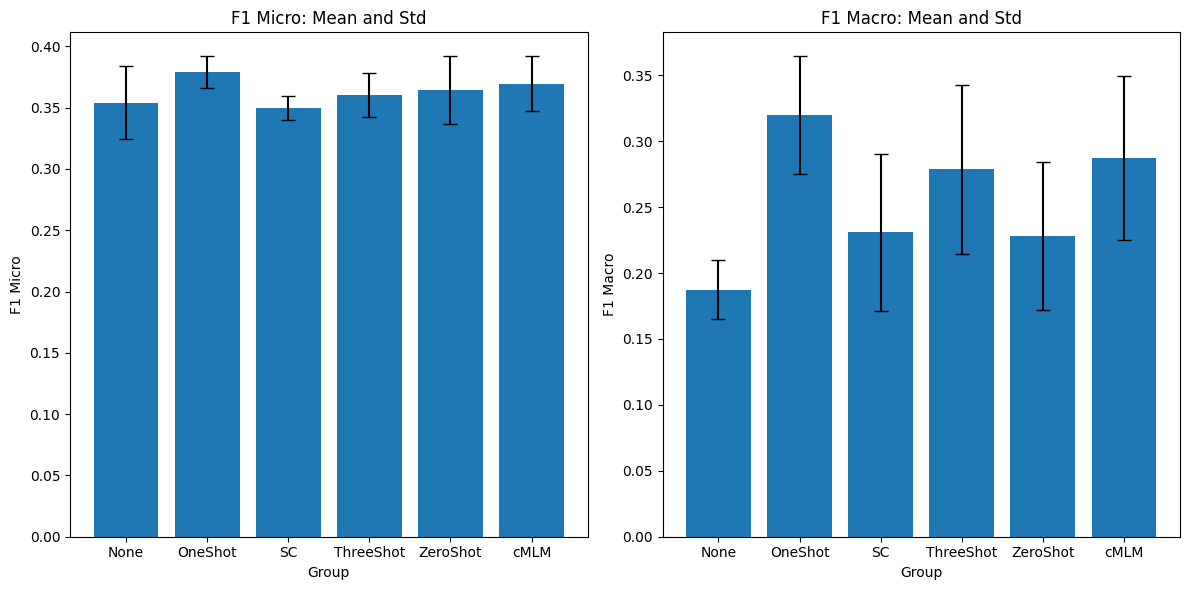

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
file_path = './Data/Summary.csv'
data = pd.read_csv(file_path)

# 파일명에서 그룹 추출 (예: 'None' 접두사 기준)
data['Group'] = data['File'].str.extract(r'(.*)_')[0]

# 그룹별 평균과 표준편차 계산
group_stats = data.groupby('Group').agg({
    'F1 Micro': ['mean', 'std'],
    'F1 Macro': ['mean', 'std']
}).reset_index()

# 컬럼 이름 정리
group_stats.columns = ['Group', 'F1 Micro Mean', 'F1 Micro Std', 'F1 Macro Mean', 'F1 Macro Std']

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# F1 Micro 시각화
axes[0].bar(group_stats['Group'], group_stats['F1 Micro Mean'], yerr=group_stats['F1 Micro Std'], capsize=5)
axes[0].set_title('F1 Micro: Mean and Std')
axes[0].set_xlabel('Group')
axes[0].set_ylabel('F1 Micro')

# F1 Macro 시각화
axes[1].bar(group_stats['Group'], group_stats['F1 Macro Mean'], yerr=group_stats['F1 Macro Std'], capsize=5)
axes[1].set_title('F1 Macro: Mean and Std')
axes[1].set_xlabel('Group')
axes[1].set_ylabel('F1 Macro')

plt.tight_layout()
plt.show()


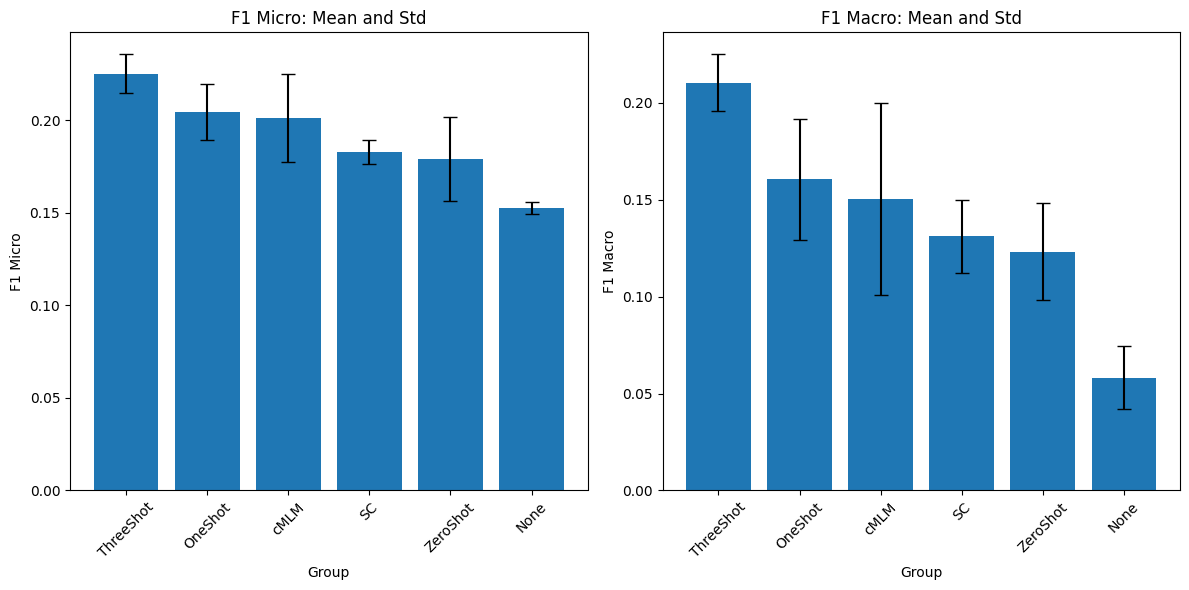

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
file_path = './Data/Summary.csv'
data = pd.read_csv(file_path)

# 파일명에서 그룹 추출 (예: 'None' 접두사 기준)
data['Group'] = data['File'].str.extract(r'(.*)_')[0]

# 그룹별 평균과 표준편차 계산
group_stats = data.groupby('Group').agg({
    'F1 Micro': ['mean', 'std'],
    'F1 Macro': ['mean', 'std']
}).reset_index()

# 컬럼 이름 정리
group_stats.columns = ['Group', 'F1 Micro Mean', 'F1 Micro Std', 'F1 Macro Mean', 'F1 Macro Std']

# F1 Micro와 F1 Macro 평균값 기준 내림차순 정렬
micro_sorted = group_stats.sort_values(by='F1 Micro Mean', ascending=False)
macro_sorted = group_stats.sort_values(by='F1 Macro Mean', ascending=False)

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# F1 Micro 시각화
axes[0].bar(micro_sorted['Group'], micro_sorted['F1 Micro Mean'], yerr=micro_sorted['F1 Micro Std'], capsize=5)
axes[0].set_title('F1 Micro: Mean and Std')
axes[0].set_xlabel('Group')
axes[0].set_ylabel('F1 Micro')
axes[0].tick_params(axis='x', rotation=45)

# F1 Macro 시각화
axes[1].bar(macro_sorted['Group'], macro_sorted['F1 Macro Mean'], yerr=macro_sorted['F1 Macro Std'], capsize=5)
axes[1].set_title('F1 Macro: Mean and Std')
axes[1].set_xlabel('Group')
axes[1].set_ylabel('F1 Macro')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [2]:
import pandas as pd

# 데이터 로드
file_path = './Data/Summary.csv'
data = pd.read_csv(file_path)

# 파일명에서 그룹 추출 (예: 'None' 접두사 기준)
data['Group'] = data['File'].str.extract(r'(.*)_')[0]

# 그룹별 평균과 표준편차 계산
group_stats = data.groupby('Group').agg({
    'F1 Micro': ['mean', 'std'],
    'F1 Macro': ['mean', 'std']
}).reset_index()

# 컬럼 이름 정리
group_stats.columns = ['Group', 'F1 Micro Mean', 'F1 Micro Std', 'F1 Macro Mean', 'F1 Macro Std']

# 평균(표준편차) 형식으로 변환 (소수점 4자리)
group_stats['F1 Micro'] = group_stats.apply(
    lambda row: f"{row['F1 Micro Mean']:.4f} ({row['F1 Micro Std']:.4f})", axis=1
)
group_stats['F1 Macro'] = group_stats.apply(
    lambda row: f"{row['F1 Macro Mean']:.4f} ({row['F1 Macro Std']:.4f})", axis=1
)

# 필요한 열만 선택
group_stats = group_stats[['Group', 'F1 Micro', 'F1 Macro']]

# 지정된 순서대로 정렬
group_order = ['None', 'SC', 'cMLM', 'ZeroShot', 'OneShot', 'ThreeShot']
group_stats['Group'] = pd.Categorical(group_stats['Group'], categories=group_order, ordered=True)
group_stats = group_stats.sort_values('Group')

# 결과를 CSV로 저장
output_file_path = './Data/Group_Stats_Sorted.csv'
group_stats.to_csv(output_file_path, index=False)

print(f"결과가 {output_file_path}에 저장되었습니다.")


결과가 ./Data/Group_Stats_Sorted.csv에 저장되었습니다.
